In [45]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
dff=pd.read_csv('atlast_data.csv',index_col=0)
cor=dff.corr()
#cor=cor.drop(columns=['time','lon','lat'])
cor.drop(columns=['time','lon','lat'],axis=0)


,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
time,-0.415741,0.387441,-0.240323,-0.368899,-0.390421,-0.605185,0.826676,0.846596,-0.440903,0.224874,-0.222992,-0.080717
lon,-0.424547,0.030846,-0.461588,-0.207922,-0.254245,-0.258727,-0.042636,-0.032703,0.175312,0.085854,0.094838,-0.096535
lat,-0.188201,0.042263,-0.147747,-0.097050,-0.086878,-0.051185,-0.007945,0.002081,0.045270,-0.023346,0.340029,-0.002991
no2,1.000000,-0.521072,0.726618,0.624651,0.651734,0.751877,-0.277203,-0.243154,0.308719,-0.064895,-0.005493,0.074401
o3,-0.521072,1.000000,-0.059292,-0.308254,-0.297094,-0.510993,0.349467,0.175435,-0.673717,-0.169933,-0.075370,0.313442
so2,0.726618,-0.059292,1.000000,0.687509,0.715760,0.611125,-0.049439,-0.159459,-0.013148,-0.183186,-0.060192,0.199419
pm2.5,0.624651,-0.308254,0.687509,1.000000,0.989233,0.782036,-0.012987,-0.153268,0.282630,-0.116184,0.132733,-0.069917
pm10,0.651734,-0.297094,0.715760,0.989233,1.000000,0.777753,-0.032763,-0.179913,0.249959,-0.150461,0.143303,-0.046335
co,0.751877,-0.510993,0.611125,0.782036,0.777753,1.000000,-0.392282,-0.413195,0.439669,-0.085150,0.060516,-0.030763
tmax,-0.277203,0.349467,-0.049439,-0.012987,-0.032763,-0.392282,1.000000,0.876554,-0.353050,0.132974,-0.118298,-0.105003


In [46]:
chem=dff['o3']
features=dff.drop(columns=['o3','so2','pm2.5','tysk','lat','lon'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chem,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.6886276905716382
r-squered for test 0.7164424486092944
             coef        p-value
const  120.925048   0.000000e+00
time    -0.025730   2.067474e-02
no2     -2.606179  4.958148e-118
pm10     0.233320   9.266049e-11
co      -0.022999   2.196687e-03
tmax     0.341165   2.323488e-11
tmin    -0.264375   7.304717e-05
hum     -0.717897  1.302800e-168
opady    0.222206   1.198890e-07
wind     3.103987  4.981081e-182


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)
vif=[variance_inflation_factor(exog=x_incl_const.values,exog_idx=i) for i in range(x_incl_const.shape[1])]
dd=pd.DataFrame({'coef_name': x_incl_const.columns,'vif':vif})
dd

,coef_name,vif
0,const,633.147661
1,time,8.358409
2,no2,2.629631
3,pm10,4.529896
4,co,5.086150
5,tmax,10.116272
6,tmin,10.952355
7,hum,2.943223
8,opady,1.679818
9,wind,1.082689


In [48]:
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
org_coef=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print('BIC',results.bic)
print('r-squared',results.rsquared)

BIC 17591.331015586202
r-squared 0.6886276905716382


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
x_incl_const=sm.add_constant(X_train)
x_incl_const=x_incl_const.drop(['tmin'],axis=1)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
reduced_coef=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print('BIC',results.bic)
print('r-squared',results.rsquared)

BIC 17599.177425605394
r-squared 0.686876319168346


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
frames=[org_coef,reduced_coef]
news=pd.concat(frames,axis=1)
news

,coef,p-value,coef,p-value
const,120.925048,0.000000e+00,127.317477,0.000000e+00
time,-0.025730,2.067474e-02,-0.047023,1.531822e-06
no2,-2.606179,4.958148e-118,-2.702620,2.454669e-131
pm10,0.233320,9.266049e-11,0.260888,1.893776e-13
co,-0.022999,2.196687e-03,-0.022696,2.576535e-03
tmax,0.341165,2.323488e-11,0.203616,5.260751e-08
tmin,-0.264375,7.304717e-05,NaN,NaN
hum,-0.717897,1.302800e-168,-0.770307,3.217124e-254
opady,0.222206,1.198890e-07,0.205448,9.187313e-07
wind,3.103987,4.981081e-182,3.041892,8.441013e-179


In [51]:
chem=dff['o3']
features=dff.drop(columns=['o3','so2','pm2.5','tysk','lat','lon','tmin'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chem,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))

x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.686876319168346
r-squered for test 0.7153927558809599
             coef        p-value
const  127.317477   0.000000e+00
time    -0.047023   1.531822e-06
no2     -2.702620  2.454669e-131
pm10     0.260888   1.893776e-13
co      -0.022696   2.576535e-03
tmax     0.203616   5.260751e-08
hum     -0.770307  3.217124e-254
opady    0.205448   9.187313e-07
wind     3.041892  8.441013e-179


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
y_test_pred=regr.predict(X_test)
y_test_pred


array([50.68729838, 70.67046039, 65.76006251, 56.97573174, 70.99220147,
       66.41092786, 69.87723291, 72.47198816, 73.85668901, 59.88585431,
       72.33026281, 66.29465295, 72.95697764, 55.5832177 , 59.51984249,
       76.70788533, 72.82143603, 64.07991597, 60.28621828, 62.19770953,
       80.61726918, 75.07141664, 78.08495417, 47.64494864, 59.53678939,
       60.96242418, 59.81377798, 59.66259374, 74.89042506, 65.46338843,
       64.44163776, 79.74134396, 63.60583311, 66.51211176, 59.06067818,
       58.78176492, 48.85476529, 68.58726155, 61.86161069, 63.61348641,
       73.30286035, 59.30699694, 53.3709068 , 57.90708228, 74.7072166 ,
       54.64288359, 62.61431999, 71.65127581, 77.07127196, 54.57229882,
       63.27381346, 78.24695127, 79.65345769, 58.30142095, 62.21087514,
       67.80791266, 69.68242407, 55.29065276, 65.22619395, 62.28751145,
       72.29402733, 61.11575936, 58.48719221, 52.04266813, 53.06606223,
       69.53099382, 69.04248946, 72.97283064, 74.70846813, 58.56

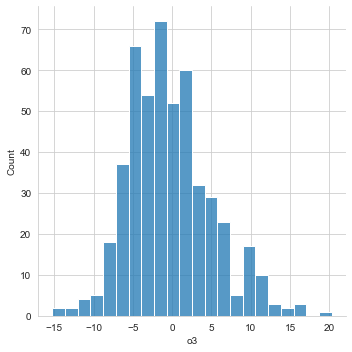

In [53]:
sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred

In [54]:
import scipy
scipy.stats.shapiro(y_for_gaus)

ShapiroResult(statistic=0.9766064882278442, pvalue=3.8128226265143894e-07)

In [55]:
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))

MAE 4.199494868484274
MSE 28.290307000180427
RMSE 5.318863318433782


r-squered for train 0.8770304662433641
r-squered for test 0.8616456845374831
MAE 2.8760101555897513
MSE 13.752587610163927
RMSE 3.7084481404172185


ShapiroResult(statistic=0.9927096366882324, pvalue=0.016064155846834183)

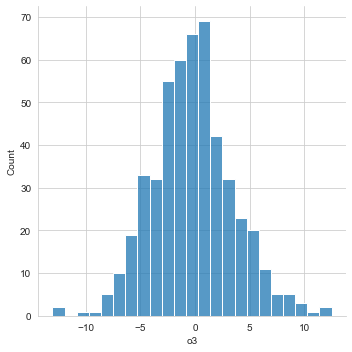

In [56]:
model=RandomForestRegressor(n_estimators=60,min_samples_leaf=5,max_depth=6,n_jobs=1)
model.fit(X_train,Y_train)
print("r-squered for train",model.score(X_train,Y_train))
print("r-squered for test",model.score(X_test,Y_test))
y_test_pred=model.predict(X_test)

sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred
scipy.stats.shapiro(y_for_gaus)
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))
scipy.stats.shapiro(y_for_gaus)